In [1]:
import pandas as pd
import numpy as np

In [2]:
EmpSala = pd.read_csv(r"C:\Users\gupta\Downloads\Machine Learning Datasets\Salary.csv")

In [3]:
EmpSala

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
EmpSala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [5]:
X = EmpSala.drop("Salary",axis=1)
Y = EmpSala["Salary"].copy()

In [6]:
print("X shape :",X.shape)
print("Y shape :",Y.shape)

X shape : (35, 1)
Y shape : (35,)


In [7]:
corr_matrix = EmpSala.corr()

In [8]:
corr_matrix['Salary'].sort_values(ascending=False)

Salary             1.000000
YearsExperience    0.982427
Name: Salary, dtype: float64

array([[<AxesSubplot:xlabel='Salary', ylabel='Salary'>,
        <AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>],
       [<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>,
        <AxesSubplot:xlabel='YearsExperience', ylabel='YearsExperience'>]],
      dtype=object)

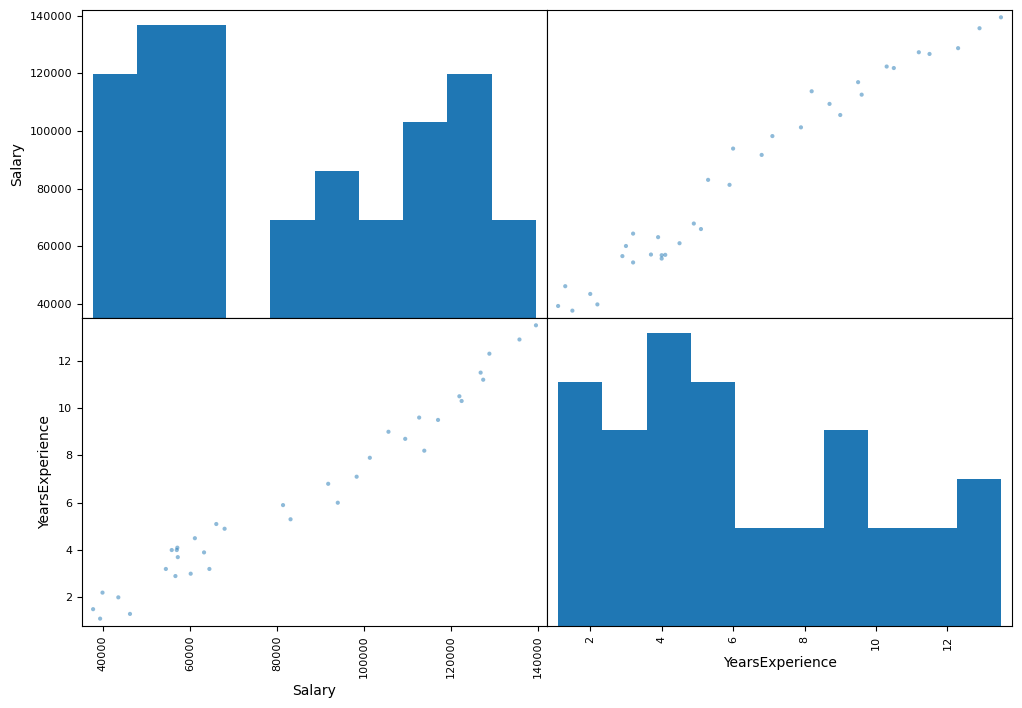

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["Salary","YearsExperience"]
scatter_matrix(EmpSala[attributes],figsize=(12,8))

## Linear Regression

## Spliting the test and train data set

In [10]:
from sklearn.model_selection import train_test_split    
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## Test Set

In [11]:
# X_test.describe()

In [12]:
# Y_test.describe()

## Training Set

In [13]:
Y_train.describe()

count        28.000000
mean      81164.000000
std       33605.917154
min       37731.000000
25%       56430.000000
50%       65237.000000
75%      112929.250000
max      139465.000000
Name: Salary, dtype: float64

In [14]:
X_train

,YearsExperience
12,4.0
8,3.2
16,5.1
9,3.7
33,12.9
0,1.1
4,2.2
17,5.3
27,9.6
5,2.9


## Applying Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # Here we are training the model
model.fit(X_train,Y_train)

LinearRegression()

## Predicting the model

In [16]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_prediction = model.predict(X_test)

C:\Users\gupta\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
print(list(y_prediction))

[110576.91706292318, 64251.57268881918, 103713.90308157443, 89987.87511887695, 71114.58667016792, 119155.68453960911, 80551.23089452244]


In [18]:
print(list(Y_test))

[116969, 57081, 109431, 98273, 67938, 121872, 93940]


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [20]:
mse = mean_squared_error(Y_test,y_prediction)
rmse = np.sqrt(mse)
print("MSE= ",mse)
print("RMSE= ",rmse)

MSE=  55761791.306260146
RMSE=  7467.381824057221


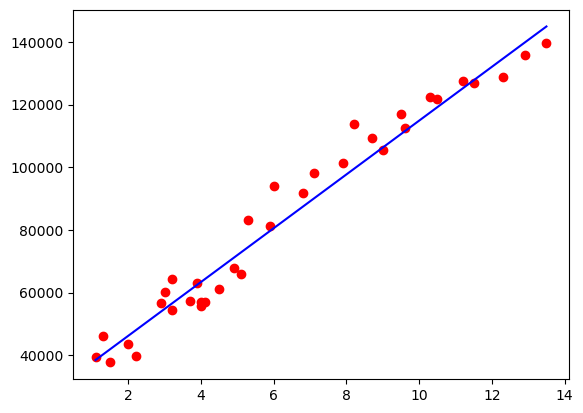

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X,Y,color='r')
plt.plot(X,model.predict(X),color='blue')

In [22]:
print("The accuracy of the testing model is :",round(model.score(X_test,Y_test),3))
print("The accuracy of the training model is :",round(model.score(X_train,Y_train),3))

The accuracy of the testing model is : 0.891
The accuracy of the training model is : 0.972


C:\Users\gupta\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\gupta\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
